### 神经网络NN

In [45]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset = load_iris()

In [46]:
data=iris_dataset["data"]
y=iris_dataset["target"]
Xt=["sepal_length","sepal_width","petal_length","petal_width"]
yt=iris_dataset['target_names']

X = pd.DataFrame(data, columns=Xt)  

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
55,5.7,2.8,4.5,1.3
61,5.9,3.0,4.2,1.5
94,5.6,2.7,4.2,1.3
52,6.9,3.1,4.9,1.5
...,...,...,...,...
18,5.7,3.8,1.7,0.3
53,5.5,2.3,4.0,1.3
33,5.5,4.2,1.4,0.2
40,5.0,3.5,1.3,0.3


In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X_train)
X_scaled = scaler.fit(X_test)

In [49]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(4),max_iter=500)

In [50]:
mlp.fit(X_train,y_train)

/Users/wang/opt/anaconda3/envs/sklearn-env/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=4, max_iter=500)

In [54]:
predictions = mlp.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.21      0.35        14
           2       0.59      1.00      0.74        16

    accuracy                           0.71        38
   macro avg       0.86      0.74      0.70        38
weighted avg       0.83      0.71      0.65        38

[[ 8  0  0]
 [ 0  3 11]
 [ 0  0 16]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.21      0.35        14
           2       0.59      1.00      0.74        16

    accuracy                           0.71        38
   macro avg       0.86      0.74      0.70        38
weighted avg       0.83      0.71      0.65        38

[[ 8  0  0]
 [ 0  3 11]
 [ 0  0 16]]


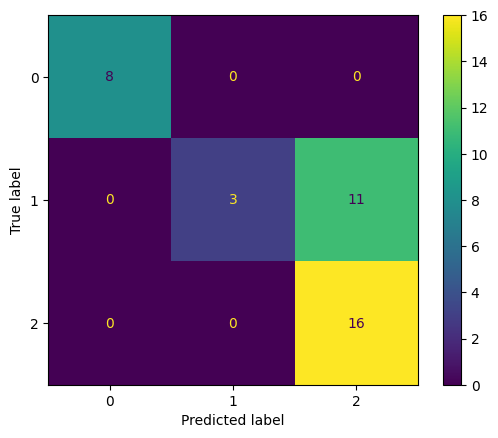

In [55]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions), display_labels=['0','1','2'])
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.21      0.35        14
           2       0.59      1.00      0.74        16

    accuracy                           0.71        38
   macro avg       0.86      0.74      0.70        38
weighted avg       0.83      0.71      0.65        38

[[ 8  0  0]
 [ 0  3 11]
 [ 0  0 16]]


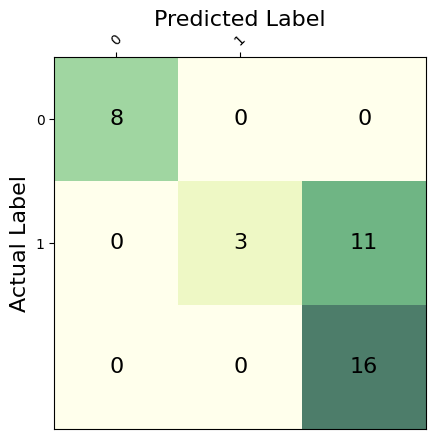

In [56]:
# 利用模型对测试集进行预测，输出target预测标签值和概率
y_test_pred = mlp.predict(X_test)
#y_test_prob = classifier.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

##### 习题：使用决策树和 KNN 对 wine 的数据进行分类得到准确率，画出决策树结构图。使用 Kmeans 对 wine 数据进行聚类，并绘制簇中心。

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# 导入数据
import pandas as pd
wine = pd.read_csv('wine.txt', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Falvanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
X = wine.drop('Cultivator',axis=1)
y = wine['Cultivator']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)

### 决策树

In [60]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [61]:
# 查看特征的重要性排序
import pandas as pd
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = dtree.feature_importances_
features = features.sort_values(by =['importance'], ascending=False)

# 显示最重要的前10个特征变量
features.head(20)

,feature,importance
12,Proline,0.393429
6,Falvanoids,0.297596
10,Hue,0.105677
9,Color_intensity,0.086024
5,Total_phenols,0.046821
2,Ash,0.023968
3,Alcalinity_of_Ash,0.023582
1,Malic_Acid,0.022903
0,Alchol,0.000000
4,Magnesium,0.000000


In [62]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12]
}

dtree = DecisionTreeClassifier()
dtree_search = GridSearchCV(dtree, parameters, scoring='accuracy', cv=5)
dtree_search.fit(X_train, y_train)

#查看最佳结果
print(dtree_search.best_estimator_)
print(dtree_search.best_score_)
print(dtree_search.best_params_)

DecisionTreeClassifier(criterion='entropy', max_depth=12)
0.9036666666666667
{'criterion': 'entropy', 'max_depth': 12}


In [66]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=12)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

              precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      0.91      0.95        23
           3       0.94      1.00      0.97        16

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

[[14  0  1]
 [ 2 21  0]
 [ 0  0 16]]


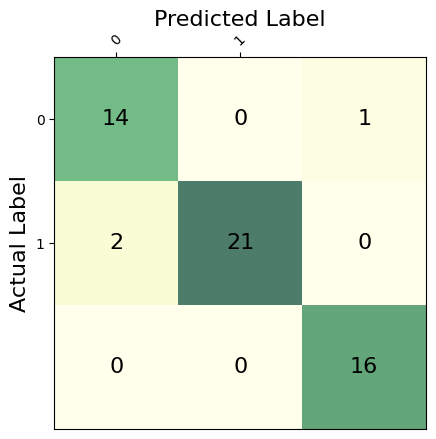

In [67]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test_pred = dtree.predict(X_test)
y_test_prob = dtree.predict_proba(X_test)

print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))
def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

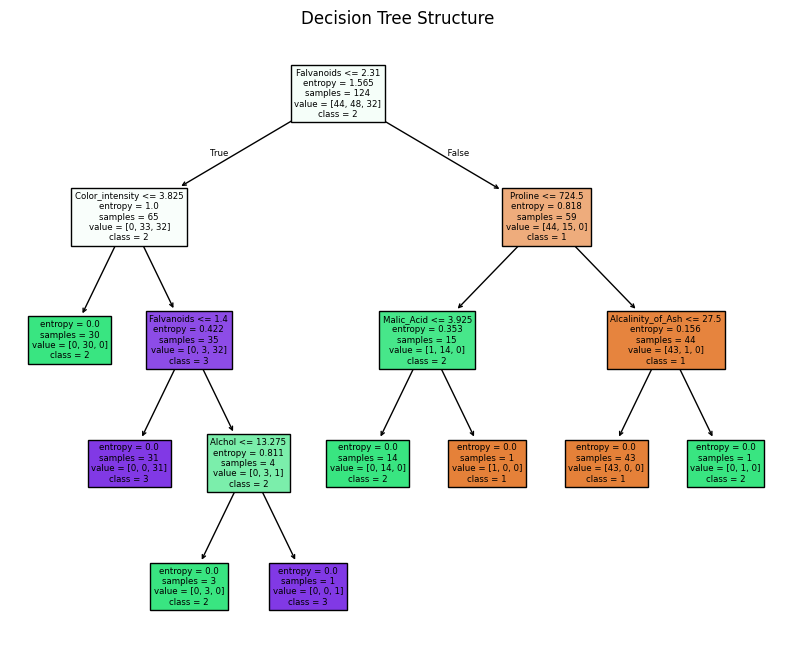

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10,8))
plot_tree(dtree, filled=True, feature_names=X.columns, class_names=["1","2","3"])
plt.title("Decision Tree Structure")
plt.show()

### KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           2       0.78      0.91      0.84        23
           3       0.71      0.31      0.43        16

    accuracy                           0.76        54
   macro avg       0.75      0.74      0.71        54
weighted avg       0.75      0.76      0.72        54



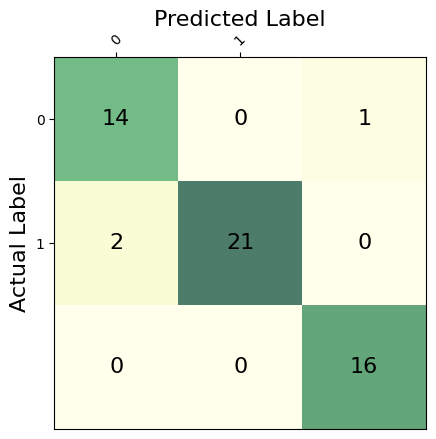

In [70]:
y_pred = model.predict(X_test) #预测类别标签
y_pred_prob = model.predict_proba(X_test) #预测类别概率

# 分类评估报告classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
def show_confusion_matrix(cnf_matrix, class_labels):
    plt.matshow(cnf_matrix, cmap=plt.cm.YlGn, alpha=0.7)
    ax = plt.gca()
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks(range(0,len(class_labels)))
    ax.set_xticklabels(class_labels,rotation=45)
    ax.set_ylabel('Actual Label', fontsize=16, rotation=90)
    ax.set_yticks(range(0,len(class_labels)))
    ax.set_yticklabels(class_labels)
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()

    for row in range(len(cnf_matrix)):
        for col in range(len(cnf_matrix[row])):
            ax.text(col, row, cnf_matrix[row][col], va='center', ha='center', fontsize=16)

class_labels = [0,1]

cnf_matrix = confusion_matrix(y_test, y_test_pred) 
show_confusion_matrix(cnf_matrix, class_labels)
plt.show()

### Kmeans

In [71]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [72]:
print(kmeans.cluster_centers_) #k个类中心点
print(kmeans.labels_)  #每一个样本所属的聚类编号

[[1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]
 [1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]]
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.21      0.22      0.21        59
           2       0.72      0.70      0.71        71
           3       0.00      0.00      0.00        48

    accuracy                           0.35       178
   macro avg       0.23      0.23      0.23       178
weighted avg       0.36      0.35      0.36       178



/Users/wang/opt/anaconda3/envs/sklearn-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wang/opt/anaconda3/envs/sklearn-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/wang/opt/anaconda3/envs/sklearn-env/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

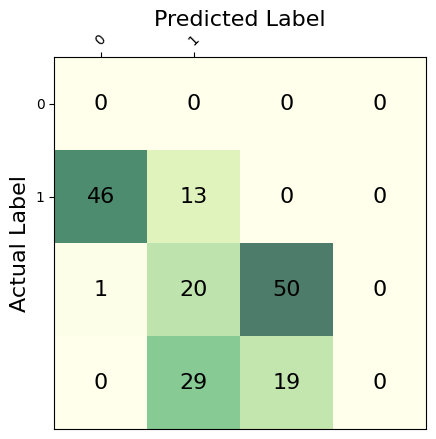

In [30]:
cluster_label = kmeans.predict(X) 
#cluster_label = cluster_label.replace({0: 1, 1: 2,2:3})
from sklearn.metrics import classification_report
print(classification_report(y,cluster_label))

cluster_pred = kmeans.predict(X)
cluster_centers = kmeans.cluster_centers_

cluster = pd.DataFrame(cluster_pred,columns=['cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_pred, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0],cluster_centers[:, 1], c='red', s=200, alpha=0.75)  # 簇中心
plt.title("KMeans Cluster Centers")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

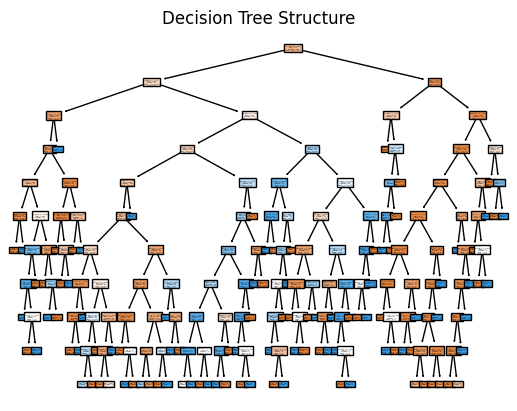

In [34]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
filename = "/Users/wang/university/homework/AI-astronomy/work/machine-learning/datasets/credit/credit.csv"
df = pd.read_csv(filename)
#X = df.drop('good_bad',axis=1)
#独热
checking = pd.get_dummies(df.checking,prefix='checking')
history = pd.get_dummies(df.history,prefix='history')
purpose = pd.get_dummies(df.purpose,prefix='purpose')
savings = pd.get_dummies(df.savings,prefix='savings')
employed = pd.get_dummies(df.employed,prefix='employed')
installp = pd.get_dummies(df.installp,prefix='installp')
marital = pd.get_dummies(df.marital,prefix='marital')
coapp = pd.get_dummies(df.coapp,prefix='coapp')
installp = pd.get_dummies(df.installp,prefix='installp')
resident = pd.get_dummies(df.resident,prefix='resident')
property = pd.get_dummies(df.property,prefix='property')
housing = pd.get_dummies(df.housing,prefix='housing')
existcr = pd.get_dummies(df.existcr,prefix='existcr')
job = pd.get_dummies(df.job,prefix='job')
depends = pd.get_dummies(df.depends,prefix='depends')
telephon = pd.get_dummies(df.telephon,prefix='telephon')
foreign = pd.get_dummies(df.foreign,prefix='foreign')
X = pd.concat([df.duration, df.amount, df.age, checking, history, purpose, savings, employed, installp, marital, coapp, installp, resident, property, housing, existcr, job, depends, telephon, foreign], axis=1)

df['target'] = 0
df.loc[(df.good_bad == 'bad'), 'target'] = 1
y = df['target']

standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
X = pd.DataFrame(X_standard, columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123456)

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)

# 查看dt特征的重要性排序
features = pd.DataFrame({'feature':X_train.columns,'importance':dt.feature_importances_})
features = features.sort_values(by =['importance'], ascending=False)
features.head(20)

#画dt树
#plt.figure(figsize=(10,8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["good","bad"])
plt.title("Decision Tree Structure")
plt.show()

#调参
parameters = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12]}
dtree = DecisionTreeClassifier()
dtree_search = GridSearchCV(dtree, parameters, scoring='accuracy', cv=5)
dtree_search.fit(X_train, y_train)
#再拟合
dt = DecisionTreeClassifier(criterion=dtree_search.best_params_['criterion'],max_depth=dtree_search.best_params_['max_depth'])
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
